<a href="https://colab.research.google.com/github/aiaaee/DigitsRecognition/blob/main/Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

In [79]:
digits = load_digits()
Display_model = digits
df = pd.DataFrame(data=Display_model.data, columns=Display_model.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [80]:
X , y = digits.data , digits.target

In [81]:
print(X.shape , y.shape)

(1797, 64) (1797,)


In [93]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Standardize

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)

In [94]:
print(X_train.shape , y_train.shape)

(1437, 64) (1437,)


<Figure size 640x480 with 0 Axes>

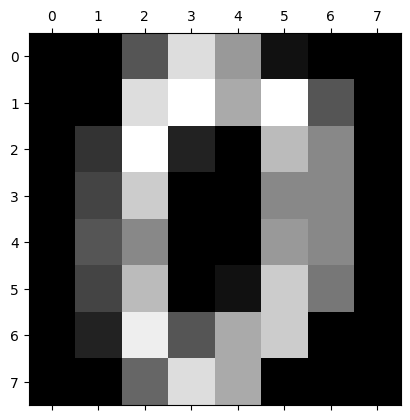

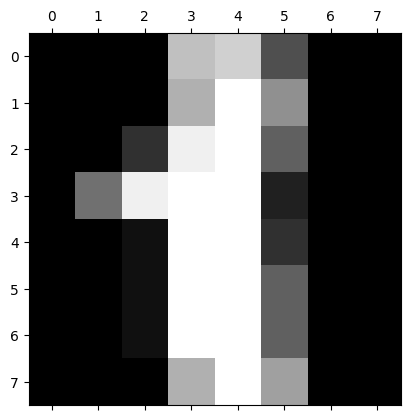

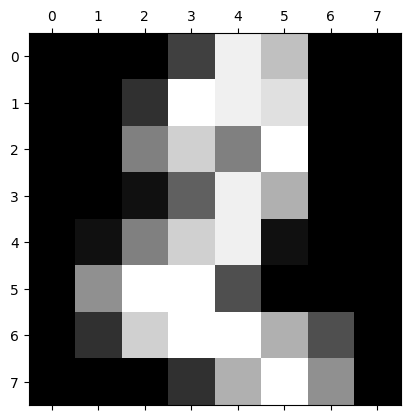

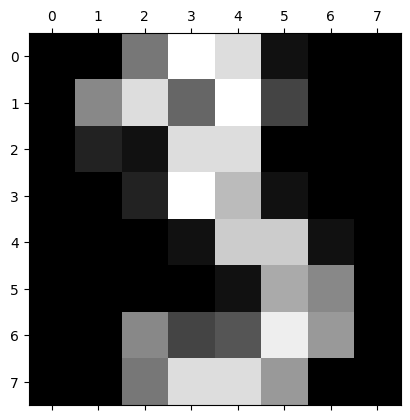

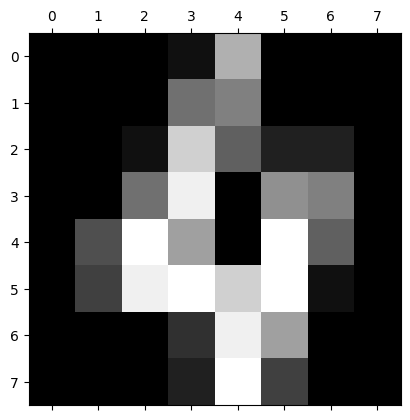

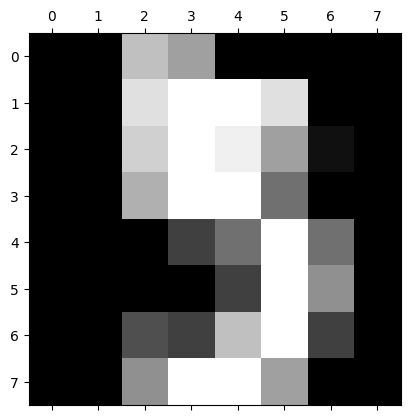

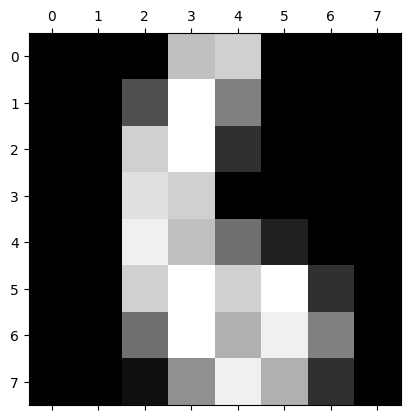

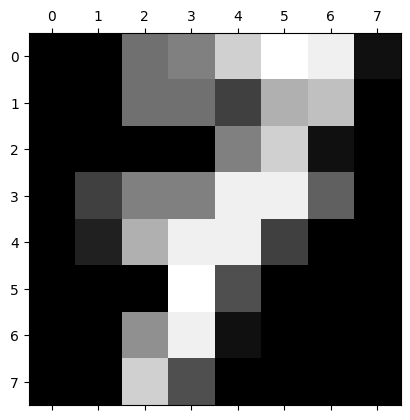

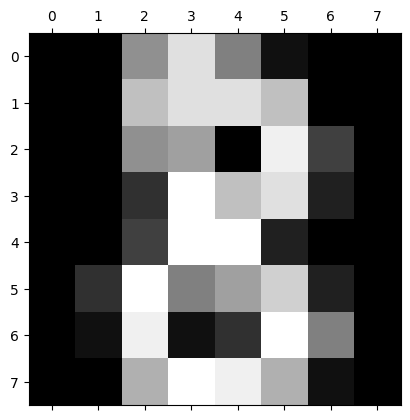

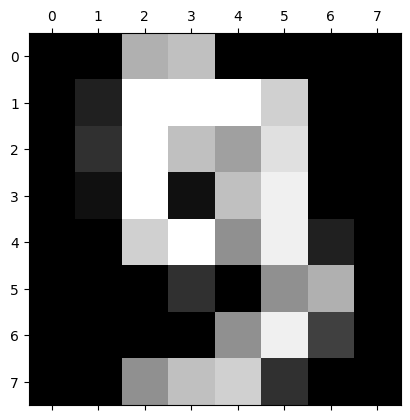

In [105]:
plt.gray()
for i in range(0 , 10):
  plt.matshow(digits.images[i])
plt.show()

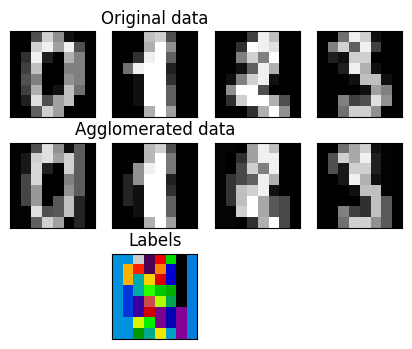

In [110]:
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)

agglo.fit(X)
X_reduced = agglo.transform(X)

X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title("Original data")
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    if i == 1:
        plt.title("Agglomerated data")
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(
    np.reshape(agglo.labels_, images[0].shape),
    interpolation="nearest",
    cmap=plt.cm.nipy_spectral,
)
plt.xticks(())
plt.yticks(())
plt.title("Labels")
plt.show()

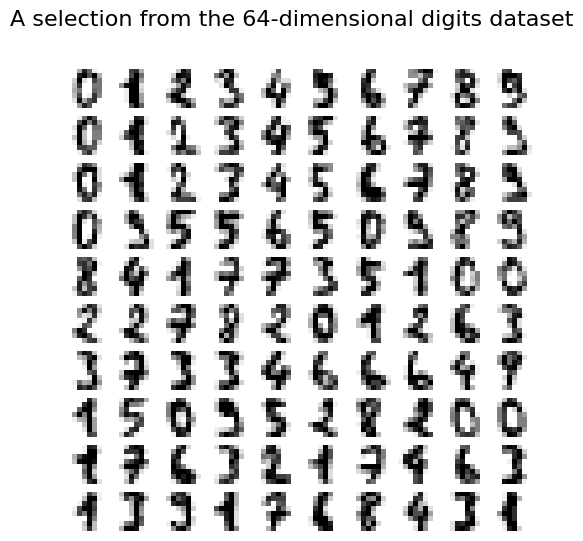

In [111]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)